# matching climate data to images

In [1]:
import numpy as np
import fitsio
import os
import pandas as pd
import astropy.stats
import sep
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
fpath = '/Users/avery/seoproject/filenames.csv'
fnames = pd.read_csv(fpath)
fn = fnames['filename']

In [3]:
cpath = '/Users/avery/seoproject/climatedata/weathvalse3.csv'
df = pd.read_csv(cpath)

In [4]:
newdates = []

for d in range(0, len(df['Date'])):
    date = df['Date'][d]
    sp = date.split('/')
    if len(sp[1])==1:
        newval = sp[2]+'0'+sp[0]+'0'+sp[1]
    else:
        newval = sp[2]+'0'+sp[0]+sp[1]
    newdates.append(newval)
    
df['date ymd'] = newdates

In [5]:
rtimes = []

for i in range(0,len(fn)):
    s = fn[i].split('_')
    if len(s)==10:
        sp = s[5]
    else:
        d = (len(s)/2) - 5
        idx = 5 + d*2
        sp = s[int(idx)]
    #     if len(s)==12:
    #         sp = s[7]
    #     if len(s)==14:
    #         sp = s[10]
    if sp[:1]=='0':
        t = sp[1:4]
    else:
        t = sp[:4]
#     print(sp)
    rtimes.append(int(round(int(t),-2)))

In [6]:
fdates = []

for i in range(0,len(fn)):
    s = fn[i].split('_')
    if len(s)==10:
        sp = s[4]
    else:
        d = (len(s)/2) - 5
        idx = 5 + d*2 - 1
        sp = s[int(idx)]

    fdates.append(sp)

In [7]:
x=np.isin(df['Time'],rtimes)
df2 = df[x]

In [8]:
y = np.isin(df2['date ymd'], fdates)
df3 = df2[y]

In [9]:
df3

,Date,Time,Temp (°F),RH (%),Wind Spd (mph),Wind Dir (°),date ymd
35,6/1/23,1200,67.0,58,4.3,S | 181,230601
36,6/1/23,1100,65.0,61,2.7,SSE | 164,230601
37,6/1/23,1000,62.0,66,2.3,SE | 133,230601
38,6/1/23,900,57.4,76,1.9,S | 172,230601
39,6/1/23,800,54.6,83,1.0,SW | 227,230601
...,...,...,...,...,...,...,...
2200,3/3/23,600,34.9,93,0.0,N | 0,230303
2201,3/3/23,500,36.7,95,0.1,E | 80,230303
2202,3/3/23,400,36.8,94,0.2,E | 85,230303
2203,3/3/23,300,36.8,92,0.3,E | 100,230303


the reason for using return_inverse instead of return_index is that return_inverse outputs an array the shape of the inputted array with the values set to the value's index in the unique array. return_index outputs an array the shape of the unique array with the index of the value's first occurence in the original inputted array.

In [9]:
fndt = {}
for i in range(0,len(rtimes)):
    fndf = df3[df3['date ymd']==fdates[i]][df3['Time']==rtimes[i]]
    fndt[i]=fndf
    
# for i in range(0,len(rtimes)):
#     if fndt[i].empty:
#         fndt[i]='noclimdata'

/var/folders/dn/860znfzd5g994cf8xvnckf1r0000gp/T/ipykernel_24982/583372194.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fndf = df3[df3['date ymd']==fdates[i]][df3['Time']==rtimes[i]]


In [42]:
fndt

{0:         Date  Time  Temp (°F)  RH (%)  Wind Spd (mph) Wind Dir (°) date ymd
 1503  4/1/23   800       39.1      95             0.0        N | 0   230401,
 1:         Date  Time  Temp (°F)  RH (%)  Wind Spd (mph) Wind Dir (°) date ymd
 2083  3/8/23   300       45.2      90             2.9      S | 178   230308,
 2:         Date  Time  Temp (°F)  RH (%)  Wind Spd (mph) Wind Dir (°) date ymd
 2195  3/3/23  1100       53.1      63             2.9      S | 190   230303,
 3:         Date  Time  Temp (°F)  RH (%)  Wind Spd (mph) Wind Dir (°) date ymd
 2196  3/3/23  1000       49.6      74             4.8    SSE | 166   230303,
 4:         Date  Time  Temp (°F)  RH (%)  Wind Spd (mph) Wind Dir (°) date ymd
 353  5/19/23   600       47.2      94             0.0     ENE | 64   230519,
 5:         Date  Time  Temp (°F)  RH (%)  Wind Spd (mph) Wind Dir (°) date ymd
 1456  4/3/23   700       39.1      66             4.5     NW | 319   230403,
 6:         Date  Time  Temp (°F)  RH (%)  Wind Spd 

# computing medians for each mkimg

In [11]:
datapath = '/Users/avery/seoproject/data2w/'
fpath = '/Users/avery/seoproject/filenames.csv'

In [12]:
fnames = pd.read_csv(fpath)
fn = fnames['filename']

In [153]:
h


SIMPLE  =                    T / conforms to FITS standard
BITPIX  =                  -32 / array data type
NAXIS   =                    2 / number of array dimensions
NAXIS1  =                 2048 / 
NAXIS2  =                 2064 / 
EXTEND  =                    T / 
DEWTEM1 =                  -15 / dewar temperature (C)
DETECTOR= 'ProLine_PL230'      / 
GAIN    =                  0.0 / e-/ADU
DARKTIME=                  112 / time since last read (seconds)
XBIN    =                    1 / 
YBIN    =                    1 / 
PIXSIZE1=                   15 / pixel size for axis 1 (microns)
PIXSIZE2=                   15 / pixel size for axis 2 (microns)
OBSERVAT= 'StoneEdge'          / 
TELESCOP= '0.5meter'           / 
OBSLONG =             -122.504 / east longitude in degrees
OBSLAT  =              38.2887 / latitude in degrees
ELEVATIO=                   60 / elevation in meters
TELSCALE=                 51.6 / arc-seconds/mm
OBSERVER= 'ixchel'             / 
RA      = '11:17:55.839

In [13]:
expts = []

for f in fn:
    h = fitsio.read_header(datapath+f)
    et = h['EXPTIME']
    expts.append(et)

In [45]:
nimgs = []

for i in range(0,len(fn)):
    data = fitsio.read(datapath+fn[i])
#     data = data / np.median(data)
    data = data / expts[i]
    nimgs.append(data)

In [107]:
%%time

mimgs = []
meds = []
segmaps = []
# dsb = []
# vs = []
objs = []

for d in range(0,len(fn)):
#     data = fitsio.read(datapath+fncl[d])
    data = nimgs[d]
    bkg = sep.Background(data)
    data_sub = data - bkg
#     data_sub = data_sub / expts[d]
#     dsb.append(data_sub)
    
    v = np.var(data_sub)
#     vs.append(v)
    th = 0.2
    
    objects, segmap = sep.extract(data_sub, thresh=th, var=v, segmentation_map=True)
    segmap = scipy.ndimage.binary_dilation(segmap, iterations=5) # default # of iters = 1
#     segmaps.append(segmap)
#     objs.append(objects)
    
    if len(objects)==0:
        print('no sources {}-th index'.format(d))
    
    mimg = np.zeros_like(data)
    mimg[segmap<1]=data[segmap<1]
    mimgs.append(mimg)
    
    med = np.median(data[segmap<1])
    meds.append(med)
    
mkimgs = np.asarray(mimgs)


CPU times: user 16min 58s, sys: 1min 3s, total: 18min 1s
Wall time: 18min 27s


In [108]:
np.save('/Users/avery/seoproject/expbkgmeds5iter',meds)

# creating list of climate data for plotting

In [14]:
fncl = []
temps = []
rh = []
wsp = []
wd = []
for i in range(0,len(rtimes)):
    if not fndt[i].empty:
        fncl.append(fn[i])
        temps.append(fndt[i]['Temp (°F)'].values[0])
        rh.append(fndt[i]['RH (%)'].values[0])
        wsp.append(fndt[i]['Wind Spd (mph)'].values[0])
        wd.append(fndt[i]['Wind Dir (°)'].values[0].split(" | ")[1])

In [25]:
findict = {'temp':temps, 'rh':rh,'wind spd':wsp, 'wind dir':wd, 'moon angle': spval}

In [26]:
findf = pd.DataFrame.from_dict(findict)

In [28]:
findf.to_csv('/Users/avery/seoproject/parapim.csv')

In [48]:
meds = np.load('/Users/avery/seoproject/bkgmeds5iter.npy')

In [16]:
exmeds = np.load('/Users/avery/seoproject/expbkgmeds5iter.npy')

In [49]:
x = np.isin(fn, fncl)
medscl = meds[x]

In [17]:
exmeds = np.asarray(exmeds)
x = np.isin(fn, fncl)
exmedscl = exmeds[x]

## plotting bkg medians versus weather parameters

### normalized by median value

Text(0, 0.5, 'bkg med val')

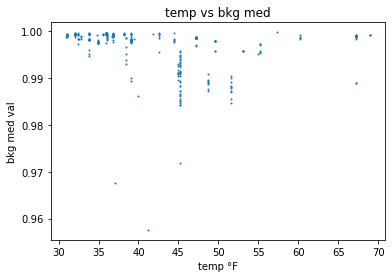

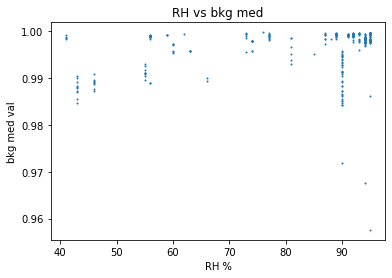

In [52]:
plt.figure()
plt.scatter(temps, medscl, s = 1)
plt.title('temp vs bkg med')
plt.xlabel('temp °F')
plt.ylabel('bkg med val')

plt.figure()
plt.scatter(rh, medscl, s = 1)
plt.title('RH vs bkg med')
plt.xlabel('RH %')
plt.ylabel('bkg med val')

Text(0, 0.5, 'bkg med val')

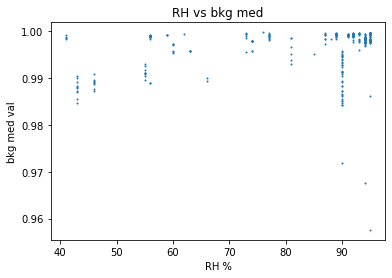

In [53]:
plt.scatter(rh, medscl, s = 1)
plt.title('RH vs bkg med')
plt.xlabel('RH %')
plt.ylabel('bkg med val')

Text(0, 0.5, 'bkg med val')

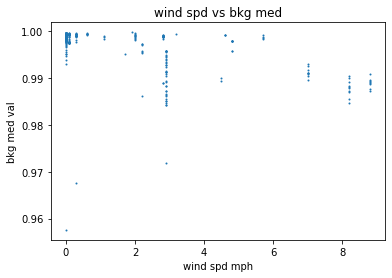

In [54]:
plt.scatter(wsp, medscl, s = 1)
plt.title('wind spd vs bkg med')
plt.xlabel('wind spd mph')
plt.ylabel('bkg med val')

Text(0, 0.5, 'bkg med val')

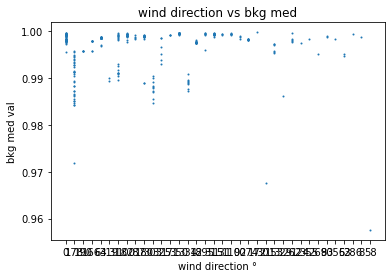

In [55]:
plt.scatter(wd, medscl, s = 1)
plt.title('wind direction vs bkg med')
plt.xlabel('wind direction °')
plt.ylabel('bkg med val')

### normalized by exposure time

Text(0, 0.5, 'bkg med val')

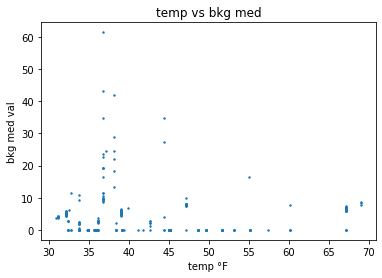

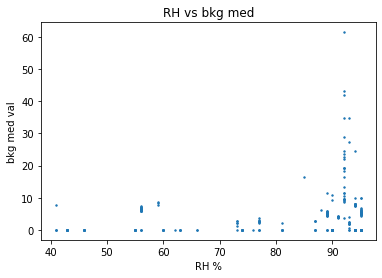

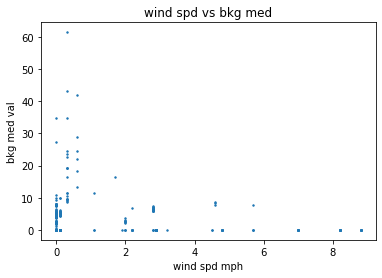

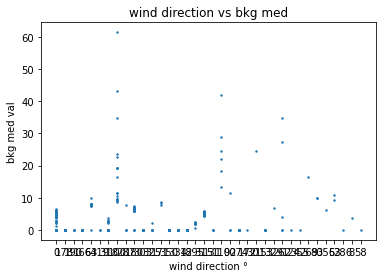

In [61]:
plt.figure()
plt.scatter(temps, exmedscl, s = 2)
plt.title('temp vs bkg med')
plt.xlabel('temp °F')
plt.ylabel('bkg med val')

plt.figure()
plt.scatter(rh, exmedscl, s = 2)
plt.title('RH vs bkg med')
plt.xlabel('RH %')
plt.ylabel('bkg med val')

plt.figure()
plt.scatter(wsp, exmedscl, s = 2)
plt.title('wind spd vs bkg med')
plt.xlabel('wind spd mph')
plt.ylabel('bkg med val')

plt.figure()
plt.scatter(wd, exmedscl, s = 2)
plt.title('wind direction vs bkg med')
plt.xlabel('wind direction °')
plt.ylabel('bkg med val')

## trying another climate data set

In [120]:
x=np.isin(df['Time'],rtimes)
df2 = df[x]

y = np.isin(df2['date ymd'], fdates)
df3 = df2[y]

fndt2 = {}
for i in range(0,len(rtimes)):
    fndf = df3[df3['date ymd']==fdates[i]][df3['Time']==rtimes[i]]
    fndt2[i]=fndf
    
# for i in range(0,len(rtimes)):
#     if fndt[i].empty:
#         fndt[i]='noclimdata'

/var/folders/dn/860znfzd5g994cf8xvnckf1r0000gp/T/ipykernel_6787/2971390619.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fndf = df3[df3['date ymd']==fdates[i]][df3['Time']==rtimes[i]]


In [121]:
fncl2 = []
temps2 = []
rh2 = []
wsp2 = []
wd2 = []
for i in range(0,len(rtimes)):
    if not fndt2[i].empty:
        fncl2.append(fn[i])
        temps2.append(fndt2[i]['Temp (°F)'].values[0])
        rh2.append(fndt2[i]['RH (%)'].values[0])
        wsp2.append(fndt2[i]['Wind Spd (mph)'].values[0])
        wd2.append(fndt2[i]['Wind Dir (°)'].values[0].split(" | ")[1])

In [123]:
len(fncl2)

194

## trying a third climate data set

In [126]:
x=np.isin(df['Time'],rtimes)
df2 = df[x]

y = np.isin(df2['date ymd'], fdates)
df3 = df2[y]

fndt3 = {}
for i in range(0,len(rtimes)):
    fndf = df3[df3['date ymd']==fdates[i]][df3['Time']==rtimes[i]]
    fndt3[i]=fndf
    
# for i in range(0,len(rtimes)):
#     if fndt[i].empty:
#         fndt[i]='noclimdata'

/var/folders/dn/860znfzd5g994cf8xvnckf1r0000gp/T/ipykernel_6787/2246857031.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fndf = df3[df3['date ymd']==fdates[i]][df3['Time']==rtimes[i]]


In [127]:
fncl3 = []
temps3 = []
rh3 = []
wsp3 = []
wd3 = []
for i in range(0,len(rtimes)):
    if not fndt3[i].empty:
        fncl3.append(fn[i])
        temps3.append(fndt3[i]['Temp (°F)'].values[0])
        rh3.append(fndt3[i]['RH (%)'].values[0])
        wsp3.append(fndt3[i]['Wind Spd (mph)'].values[0])
        wd3.append(fndt3[i]['Wind Dir (°)'].values[0].split(" | ")[1])

In [129]:
fncl3==fncl2

True

In [136]:
fdates=np.asarray(fdates)
fdcl=fdates[x]
rtimes=np.asarray(rtimes)
rtcl = rtimes[x]

In [140]:
uq, ix = np.unique(fdcl, return_inverse=True)

In [141]:
uq

array(['230303', '230306', '230308', '230401', '230402', '230403',
       '230404', '230405', '230601'], dtype='<U6')

In [151]:
np.unique(rtcl[np.where(ix==6)])

array([600])

In [10]:
import astropy.coordinates

In [154]:
h


SIMPLE  =                    T / conforms to FITS standard
BITPIX  =                  -32 / array data type
NAXIS   =                    2 / number of array dimensions
NAXIS1  =                 2048 / 
NAXIS2  =                 2064 / 
EXTEND  =                    T / 
DEWTEM1 =                  -15 / dewar temperature (C)
DETECTOR= 'ProLine_PL230'      / 
GAIN    =                  0.0 / e-/ADU
DARKTIME=                  112 / time since last read (seconds)
XBIN    =                    1 / 
YBIN    =                    1 / 
PIXSIZE1=                   15 / pixel size for axis 1 (microns)
PIXSIZE2=                   15 / pixel size for axis 2 (microns)
OBSERVAT= 'StoneEdge'          / 
TELESCOP= '0.5meter'           / 
OBSLONG =             -122.504 / east longitude in degrees
OBSLAT  =              38.2887 / latitude in degrees
ELEVATIO=                   60 / elevation in meters
TELSCALE=                 51.6 / arc-seconds/mm
OBSERVER= 'ixchel'             / 
RA      = '11:17:55.839

In [157]:
astropy.time.Time(h['MJD-OBS'], format='mjd')

<Time object: scale='utc' format='mjd' value=60035.31059028>

In [20]:
earth = astropy.coordinates.EarthLocation(lon=h['OBSLONG'], lat=h['OBSLAT'])

coords = []
for i in range(0,len(fncl)):
    h = fitsio.read_header(datapath+fncl[i])
    time = astropy.time.Time(h['MJD-OBS'], format='mjd')
    moon = astropy.coordinates.get_body(body='moon', time=time, location=earth)
    coords.append(moon.transform_to('icrs'))

In [163]:
coords[0].ra.value

139.84478961562726

In [14]:
import astropy.units as u

In [62]:
np.unique(fdates)

array(['230303', '230306', '230308', '230318', '230325', '230326',
       '230327', '230401', '230402', '230403', '230404', '230405',
       '230412', '230519', '230601'], dtype='<U6')

coordinate frame of telescope is j2000; icrs closest substitute according to [astropy](https://docs.astropy.org/en/stable/api/astropy.coordinates.ICRS.html)

In [22]:
tcoords = []
for i in range(0,len(fncl)):
    h = fitsio.read_header(datapath+fncl[i])
    ra = h['RA']
    dec = h['DEC']
    coord = [ra,dec]
    c = astropy.coordinates.SkyCoord(ra, dec, unit=(u.hourangle, u.deg), frame='icrs')
    tcoords.append(c)

In [23]:
seps = []

for i in range(0,len(fncl)):
    sep = tcoords[i].separation(coords[i])
    seps.append(sep)

In [24]:
spval = []
for s in seps:
    spval.append(s.value)

Text(0, 0.5, 'bkg med val')

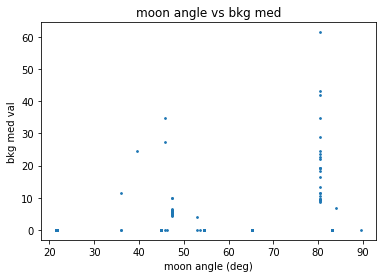

In [216]:
plt.figure()
plt.scatter(spval, exmedscl, s=3)
plt.title(f'moon angle vs bkg med')
plt.xlabel('moon angle (deg)')
plt.ylabel('bkg med val')

below is plotted with all images. above is only those included in climate data

In [15]:
datapath = '/Users/avery/seoproject/data2w/'
h = fitsio.read_header(datapath+fn[0])
earth = astropy.coordinates.EarthLocation(lon=h['OBSLONG'], lat=h['OBSLAT'])

coords = []
for i in range(0,len(fn)):
    h = fitsio.read_header(datapath+fn[i])
    time = astropy.time.Time(h['MJD-OBS'], format='mjd')
    moon = astropy.coordinates.get_body(body='moon', time=time, location=earth)
    coords.append(moon.transform_to('icrs'))

tcoords = []
for i in range(0,len(fn)):
    h = fitsio.read_header(datapath+fn[i])
    ra = h['RA']
    dec = h['DEC']
    coord = [ra,dec]
    c = astropy.coordinates.SkyCoord(ra, dec, unit=(u.hourangle, u.deg), frame='icrs')
    tcoords.append(c)
    
seps = []

for i in range(0,len(fn)):
    sep = coords[i].separation(tcoords[i])
    seps.append(sep)
    
spval = []
for s in seps:
    spval.append(s.value)

In [16]:
meds = np.load('/Users/avery/seoproject/expbkgmeds5iter.npy')

Text(0, 0.5, 'bkg med val')

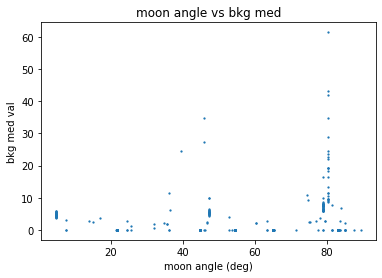

In [17]:
plt.figure()
plt.scatter(spval, meds, s=1.5)
plt.title(f'moon angle vs bkg med')
plt.xlabel('moon angle (deg)')
plt.ylabel('bkg med val')

In [5]:
datapath = '/Users/avery/seoproject/data2w/'
clouds = []
ambients = []
primaries = []
secondars = []
times = []

for f in fn:
    h = fitsio.read_header(datapath+f)
    clouds.append(h['CLOUD'])
    ambients.append(h['AMBIENT'])
    primaries.append(h['PRIMARY'])
    secondars.append(h['SECONDAR'])
    times.append(int(h['UT'].replace(':', '')))

In [6]:
meds = np.load('/Users/avery/seoproject/expbkgmeds5iter.npy')

Text(0.5, 1.0, 'secondar C  vs med pix val')

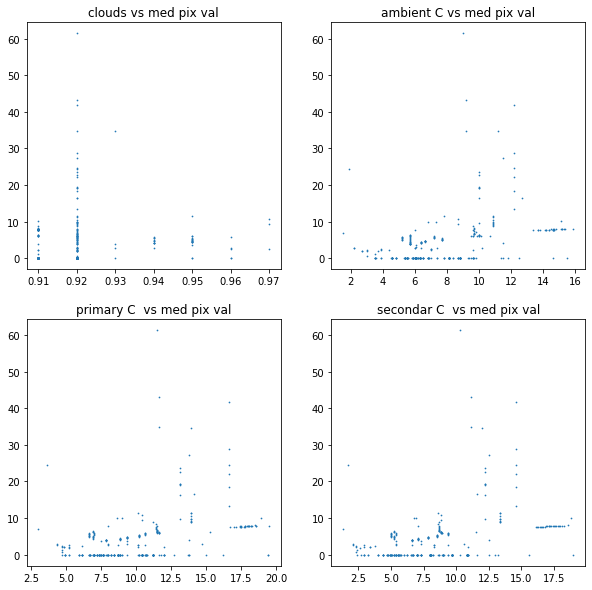

In [7]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
fig.tight_layout
axs[0,0].scatter(clouds, meds, s=0.5)
axs[0,0].set_title('clouds vs med pix val')

axs[0,1].scatter(ambients, meds, s=0.5)
axs[0,1].set_title('ambient C vs med pix val')

axs[1,0].scatter(primaries, meds, s=0.5)
axs[1,0].set_title('primary C  vs med pix val')


axs[1,1].scatter(secondars, meds, s=0.5)
axs[1,1].set_title('secondar C  vs med pix val')